<div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 80% ; height: 250px">
        <div style="position: relative ; top: 10% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%"
                 > Outil 
            </div>
            <div style="font-size: x-large ; padding-top: 20px ; color: rgba(255 , 0 , 0 , 0.8)"
                 > Régression linéaire interactive
             </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.6)"
                 > Université Bretagne Sud, Lorient, France
             </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 255 , 0.7)"
                 > Licence Mécanique
             </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.6)"
                 > Auteur : Prof. Vincent Keryvin
             </div>
        </div>
    </div>

---
# Préambule
---

## Signification des bibliothèques

- numpy
    > The fundamental package for scientific computing with Python
- matplotlib
    > Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- ipywidgets
    > ipywidgets, also known as jupyter-widgets or simply widgets, are interactive HTML widgets for Jupyter notebooks and the IPython kernel.
- scipy
    > SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.

## Import des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wid
from scipy.optimize import curve_fit

In [2]:
%matplotlib widget

---
# Travail
---

## Données dont on fait la régression

In [3]:
xdata = np.linspace(0, 10, 100)
f = lambda x: 2*x+1 + np.random.rand(x.shape[0])*3
ydata = f(xdata)

## Fonction de régression

In [4]:
fit = lambda x, a, b: a*x+b

## Régression interactive

Output()

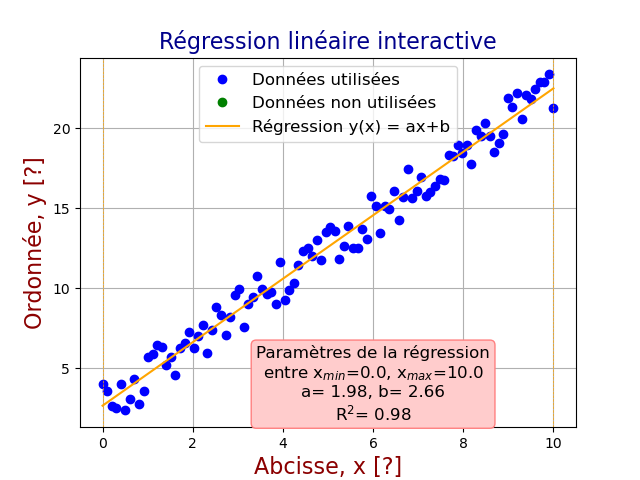

In [34]:
# Réglages de la figure
fig, ax = plt.subplots()
ax.set_title(r'Régression linéaire interactive', color='darkblue', size=16)
ax.grid(True)
ax.set_xlabel("Abcisse, x [?]",    color='darkred', size=16)
ax.set_ylabel("Ordonnée, y [?]", color='darkred', size=16)

# Fonction d'ctualisation de la figure
def toto(xmin,xmax):
    [l.remove() for l in ax.lines]             # on enleve les précédents tracés
    [l.remove() for l in ax.texts]             # on enleve les précédents tracés
    condition1 = (xdata<=xmax) & (xdata>=xmin)
    xfit = np.extract(condition1, xdata)       # intervalle choisi entre les abcisses xmin et xmax
    yfit = f(xfit)                             # plage des ordonnées associée
    condition2 = (xdata>xmax) | (xdata<xmin)
    xnfit = np.extract(condition2, xdata)      # intervalle complémentaire
    ynfit = f(xnfit)                           # plage des ordonnées associée
    popt, pcov = curve_fit(fit,xfit,yfit)      # régression linéaire au sens des moindes carrés discrets
    residuals = yfit - fit(xfit, *popt)        # écarts entre données et régression
    ss_res = np.sum(residuals**2)              # somme des carrés des écarts
    ss_tot = np.sum((yfit-np.mean(yfit))**2)
    r2 = 1 - (ss_res / ss_tot)                 # coefficient de régression (son carré)
    plt.plot(xfit, yfit, 'o', color='blue', label='Données utilisées')
    plt.plot(xnfit, ynfit, 'o', color='green', label='Données non utilisées')
    plt.plot(xfit, fit(xfit,*popt), color='orange', label='Régression y(x) = ax+b')
    plt.legend(fontsize=12)
    plt.axvline(xmin, ls='--', c='orange', lw=.5)
    plt.axvline(xmax, ls='--', c='orange', lw=.5)
    texte = 'Paramètres de la régression'  + '\n' + 'entre x$_{min}$=%3.1f, x$_{max}$=%3.1f' % (xmin,xmax) + '\n' + 'a=%5.2f, b=%5.2f' % tuple(popt) + '\n' +'R$^2$=%5.2f'% (r2)
    plt.text(6, 4, texte, size=12, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
a = wid.FloatSlider(min=xdata.min(), max=xdata.max(), value=xdata.min(), step=.1, description="xmin")
b = wid.FloatSlider(min=xdata.min(), max=xdata.max(), value=xdata.max(), step=.1, description="xmax")
w = wid.interactive_output(toto, {'xmin': a, 'xmax': b})
ui = wid.VBox([a, b])
display(w,ui)

## Sauvegarde du graphe dans sa version travaillée pour ajout dans un compte-rendu

In [6]:
plt.savefig('Figure_propre_pour_CR.pdf')